## Project Stage - II (Data Modeling and Hypothesis Testing)

## Goals

The goal of Stage II is to develop formal hypothesis tests for the intuitions you had in Stage I and utilize statistical modeling to prove/disprove them.

### Tasks:

#### Task 1: (50 pts)
- Team: (25)
    - Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US. 
    - Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
        - Choose atleast 5 similar populations countries to compare. 
    - Plot daily trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases (new cases), and log normalized values. 
    - Identify peak week of the cases and deaths in US and other countries. 
- Member: (25 pts)
    - Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific state. 
    - Compare the data against other states. 
    - Identify counties with high case and death rates.
    - Plot daily trends (cases and deaths, new cases) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values. 
    
#### Task 2: (50 pts)
- Member:
    - Fit a distribution to the number of COVID-19 cases of a state. 
        - Graphically plot the distribution and describe the distribution statistics.
        - Describe why the distribution was choosen and its statistics in the report and the notebook. 
    - Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. 
    - Model poission distributions for North Carolina counties COVID-19 in cases and deaths.
    - Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.
    - Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. 
        - For example: *Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.* 


**Deliverable**
- Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

*PS: Try to use `Plotly` for your charts. Will be useful in Stage IV*

## Deadline: 10/22/2020

# Task 1: Member Task

#### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import os
from IPython.display import Image

In [23]:
if not os.path.exists("images"):
    os.mkdir("images")

#### Read CSV Files

In [24]:
confirmedCases = pd.read_csv("covid_confirmed_usafacts.csv")
covidDeaths = pd.read_csv("covid_deaths_usafacts.csv")
countyPopulation = pd.read_csv("covid_county_population_usafacts.csv")

## New York Weekly Stats

### Retrieve last week confirmed cases of New York

In [25]:
# last week cases
confirmedCasesLastWeek = confirmedCases.iloc[:,[0,1,2,-7,-6,-5,-4,-3,-2,-1]]
# NY cases
confirmedCasesLastWeek_NY = confirmedCasesLastWeek[confirmedCases.State=='NY']
confirmedCasesLastWeek_NY = confirmedCasesLastWeek_NY.set_index(['countyFIPS', 'County Name']).drop([0,1], axis = 0)
confirmedCasesLastWeek_NY

,,State,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
countyFIPS,County Name,,,,,,,,
36001,Albany County,NY,3436,3460,3488,3516,3549,3577,3590
36003,Allegany County,NY,220,224,243,264,269,271,287
36005,Bronx County,NY,54523,54628,54706,54792,54892,55011,55086
36007,Broome County,NY,3003,3060,3166,3262,3330,3368,3415
36009,Cattaraugus County,NY,417,434,442,447,455,461,462
...,...,...,...,...,...,...,...,...,...
36115,Washington County,NY,326,326,326,327,330,332,334
36117,Wayne County,NY,386,393,400,408,432,448,471
36119,Westchester County,NY,39616,39694,39789,39890,40041,40131,40202


### Last Week Daily Mean of Confirmed Cases in New York

In [26]:
# Mean of each day
confirmedCasesLastWeeklyMean_NY = confirmedCasesLastWeek_NY.groupby('State').mean()
confirmedCasesLastWeeklyMean_NY

,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
State,,,,,,,
NY,7846.451613,7879.129032,7905.387097,7931.790323,7965.032258,7991.354839,8010.564516


### Last Week Overall Mean of Confirmed Cases in New York

In [27]:
confirmedCasesLastWeeklyMean_NY.mean(axis=1)

State
NY    7932.815668
dtype: float64

### Median of Last Week's Daily Confirmed Cases in New York

In [28]:
# Median of each day
confirmedCasesLastWeeklyMedian_NY = confirmedCasesLastWeek_NY.groupby('State').median()
confirmedCasesLastWeeklyMedian_NY

,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
State,,,,,,,
NY,546.5,552.0,562.0,568.5,575.0,587.5,597.5


### Median of Last Week's Overall Confirmed Cases in New York

In [29]:
confirmedCasesLastWeeklyMedian_NY.median(axis = 1)

State
NY    568.5
dtype: float64

### Mode of Last Week's Daily Confirmed Cases in New York

In [30]:
confirmedCasesLastWeek_NY.mode().head(10)

,State,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
0,NY,368.0,372.0,376.0,379.0,384.0,16,115.0
1,NaN,NaN,NaN,NaN,488.0,NaN,79,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,109,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,112,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,116,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,169,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,182,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,197,NaN


### Retrieve last week deaths of New York

In [31]:
# Last week deaths
covidDeathsLastWeek = covidDeaths.iloc[:,[0,1,2,-7,-6,-5,-4,-3,-2,-1]]
# Deaths in NY
covidDeathsLastWeek_NY = covidDeathsLastWeek[covidDeaths.State=='NY']
covidDeathsLastWeek_NY = covidDeathsLastWeek_NY.set_index(['countyFIPS','County Name']).drop([0,1,], axis = 0)
covidDeathsLastWeek_NY

,,State,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
countyFIPS,County Name,,,,,,,,
36001,Albany County,NY,126,126,126,127,127,128,128
36003,Allegany County,NY,9,9,9,9,9,10,11
36005,Bronx County,NY,4980,4980,4983,4985,4985,4986,4986
36007,Broome County,NY,89,89,90,90,90,97,98
36009,Cattaraugus County,NY,16,16,16,17,17,17,19
...,...,...,...,...,...,...,...,...,...
36115,Washington County,NY,14,14,14,14,14,14,14
36117,Wayne County,NY,3,3,3,3,3,3,3
36119,Westchester County,NY,1469,1470,1470,1470,1470,1471,1471


### Last Week Daily Mean of Deaths in New York

In [32]:
# Daily deaths in NY
covidDeathsLastWeeklyMean_NY = covidDeathsLastWeek_NY.groupby('State').mean()
covidDeathsLastWeeklyMean_NY

,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
State,,,,,,,
NY,531.870968,531.951613,532.241935,532.532258,532.548387,532.870968,533.129032


### Last Week Overall Mean of Deaths in New York

In [33]:
covidDeathsLastWeeklyMean_NY.mean(axis=1)

State
NY    532.449309
dtype: float64

### Median of Last Week's Deaths Cases in New York

In [34]:
covidDeathsLastWeeklyMedian_NY = covidDeathsLastWeek_NY.groupby('State').median()
covidDeathsLastWeeklyMedian_NY

,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
State,,,,,,,
NY,15.5,15.5,15.5,16.0,16.0,16.0,18.0


### Median of Last Week's Overall Deaths in New York

In [35]:
covidDeathsLastWeeklyMedian_NY.median(axis = 1)

State
NY    16.0
dtype: float64

### Mode of Last Week's Deaths Cases in New York

In [36]:
covidDeathsLastWeek_NY.mode().head(10)

,State,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
0,NY,1,1,1,1,1,1,5.0
1,NaN,5,5,4,4,4,4,NaN
2,NaN,6,6,5,5,5,5,NaN
3,NaN,9,9,6,6,6,6,NaN


## Compare Against Other States

## New York Counties

### Normalized by Population

In [37]:
nyCountyPopulation = countyPopulation[countyPopulation.State == 'NY']
nySelectedCounties = nyCountyPopulation.set_index('County Name').loc[['Queens County','Kings County','Bronx County','Nassau County','Suffolk County']]
nySelectedCounties

,countyFIPS,State,population
County Name,,,
Queens County,36081,NY,2253858
Kings County,36047,NY,2559903
Bronx County,36005,NY,1418207
Nassau County,36059,NY,1356924
Suffolk County,36103,NY,1476601


### Highest Last Week's Confirmed Cases in New York

In [38]:
confirmedCasesLastWeek_NY.max(axis = 1).sort_values(ascending = False)

countyFIPS  County Name     
36081       Queens County       76316
36047       Kings County        74703
36005       Bronx County        55086
36059       Nassau County       49377
36103       Suffolk County      48717
                                ...  
36049       Lewis County          115
36123       Yates County          115
36095       Schoharie County      109
36033       Franklin County        80
36041       Hamilton County        16
Length: 62, dtype: int64

### Highest Last Week's Deaths in New York

In [39]:
highestCovidDeathsLastWeek_NY = covidDeathsLastWeek_NY.max(axis = 1).sort_values(ascending = False)
highestCovidDeathsLastWeek_NY

countyFIPS  County Name     
36047       Kings County        7385
36081       Queens County       7292
36005       Bronx County        4986
36061       New York County     3193
36059       Nassau County       2209
                                ... 
36045       Jefferson County       1
36023       Cortland County        1
36041       Hamilton County        1
36033       Franklin County        1
36109       Tompkins County        0
Length: 62, dtype: int64

## New York Daily Trends

### Top 5 Counties by Confirmed Cases

In [40]:
counties = ['Kings County', 'Queens County', 'Bronx County', 'New York County', 'Nassau County']
cases = [75109, 73123, 54409, 48596, 48029]
fig = go.Figure([go.Bar(x=counties, y= cases)])
fig.show()

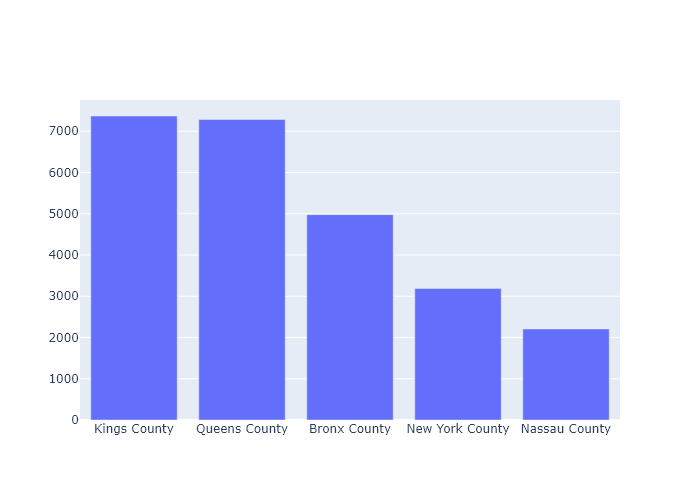

In [56]:
Image(filename = "fig1.png", width = 600, height = 300)

In [55]:
fig.write_image("images/fig1.png")

### Top 5 Counties by Deaths

In [48]:
counties = ['Kings County', 'Queens County', 'Bronx County', 'New York County', 'Nassau County']
deaths = [7370, 7286, 4978, 3190, 2208]
fig = go.Figure([go.Bar(x=counties, y= deaths)])
fig.show()

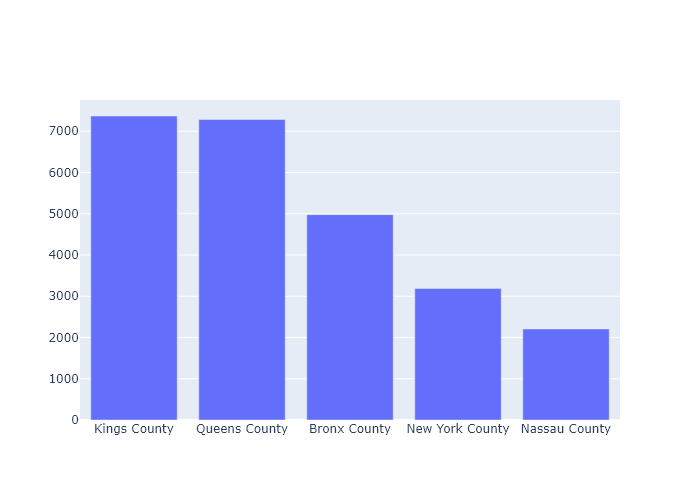

In [57]:
Image(filename = "fig2.png", width = 600, height = 300)

In [52]:
fig.write_image("images/fig2.png")

# Task 2: Member Task

array([[<AxesSubplot:title={'center':'10/20/20'}>,
        <AxesSubplot:title={'center':'10/21/20'}>,
        <AxesSubplot:title={'center':'10/22/20'}>],
       [<AxesSubplot:title={'center':'10/23/20'}>,
        <AxesSubplot:title={'center':'10/24/20'}>,
        <AxesSubplot:title={'center':'10/25/20'}>],
       [<AxesSubplot:title={'center':'10/26/20'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

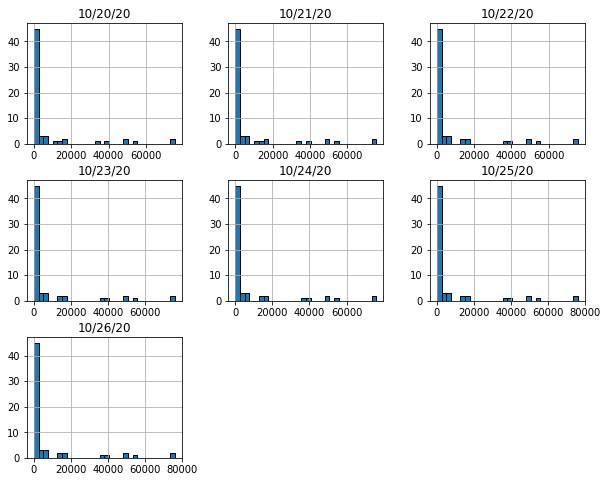

In [24]:
confirmedCasesLastWeek_NY.hist(bins=30, ec='black', figsize=(10,8))